## National Parks Data Analysis

In [17]:
# Import dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pymongo import MongoClient

In [18]:
# Connect to MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client['national_parks_db']
collection = db['Activities_and_Amenities_Collection']

In [19]:
# Query MongoDB to retrieve data
cursor = collection.find({}, {'park_code': 1, 'activity_name': 1})

In [20]:
# Create a DataFrame from the query results
activity_options_df = pd.DataFrame(list(cursor))

### Consideration 1: Evaluate the number of parks offering each activity option

In [21]:
# Count the number of parks offering each amenity
park_activity_counts = activity_options_df.groupby('activity_name')['park_code'].nunique().reset_index()

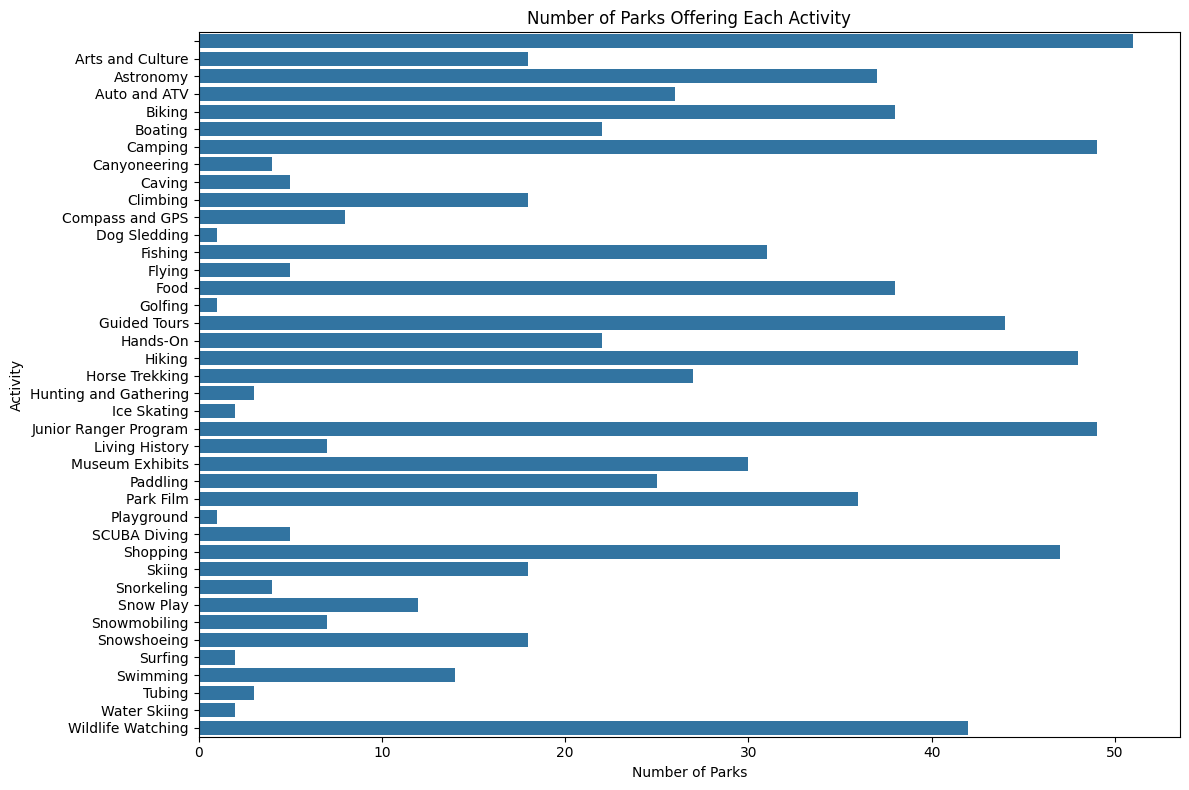

In [22]:
# Create a bar graph using Seaborn with x and y axes switched
plt.figure(figsize=(12, 8))  # Adjust the figure size for better spacing
sns.barplot(x='park_code', y='activity_name', data=park_activity_counts)
plt.xlabel('Number of Parks')
plt.ylabel('Activity')
plt.title('Number of Parks Offering Each Activity')
plt.tight_layout()  
plt.show()

#### Findings: Visual review of the bargraph shows a large variation in the number of parks offering each activity. Visual review appears to show that activities that occur outdoors and are temperature dependant, for example: Dog Sledding, appear to be localized to a relatively few number of parks, while activities with a wide temperature tolerance, for example: hiking, appear to be available at more locations. 

### Consideration 2: Evaluate the relationship between the season and the activites available

In [23]:
# Create activity lists by season 
Winter = ['Arts and Culture', 'Astronomy', 'Auto and ATV', 'Compass and GPS', 'Dog Sledding', 'Flying', 'Food', 'Guided Tours', 'Hands-On',  
                 'Hunting and Gathering', 'Ice Skating', 'Junior Ranger Program', 'Living History', 'Museum Exhibits', 'Shopping', 'Skiing', 
                 'Snorkeling', 'Snow Play', 'Snowmobiling', 'Snowshoeing', 'Wildlife Watching']

Spring = ['Arts and Culture', 'Astronomy', 'Auto and ATV', 'Biking', 'Camping', 'Canyoneering', 'Caving', 'Climbing', 
                 'Compass and GPS', 'Fishing', 'Flying', 'Food', 'Golfing', 'Guided Tours', 'Hands-On', 'Hiking', 'Horse Trekking', 
                 'Hunting and Gathering', 'Junior Ranger Program', 'Living History', 'Museum Exhibits', 'Park Film', 
                 'Playground', 'Shopping', 'Wildlife Watching']

Summer = ['Arts and Culture', 'Astronomy', 'Auto and ATV', 'Biking', 'Boating', 'Camping', 'Canyoneering', 'Caving', 'Climbing', 'Compass and GPS', 
                 'Fishing', 'Flying', 'Food', 'Golfing', 'Guided Tours', 'Hands-On', 'Hiking', 'Horse Trekking', 'Hunting and Gathering', 'Junior Ranger Program', 
                 'Living History', 'Museum Exhibits', 'Paddling', 'Park Film', 'Playground', 'SCUBA Diving', 'Shopping', 'Snorkeling', 'Surfing', 'Swimming', 
                 'Tubing', 'Water Skiing', 'Wildlife Watching']

Fall = ['Arts and Culture', 'Astronomy', 'Auto and ATV', 'Biking', 'Camping', 'Canyoneering', 'Caving', 'Climbing', 
                 'Compass and GPS', 'Fishing', 'Flying', 'Food', 'Golfing', 'Guided Tours', 'Hands-On', 'Hiking', 'Horse Trekking', 
                 'Hunting and Gathering', 'Junior Ranger Program', 'Living History', 'Museum Exhibits', 'Park Film', 
                 'Playground', 'Shopping', 'Wildlife Watching']


In [24]:
# Create a DataFrame with the activities available in each season, considering unequal entries in each season list

# Define the activities available in each season with padded None values
max_length = max(len(Winter), len(Spring), len(Summer), len(Fall))

Winter_padded = Winter + [None] * (max_length - len(Winter))
Spring_padded = Spring + [None] * (max_length - len(Spring))
Summer_padded = Summer + [None] * (max_length - len(Summer))
Fall_padded = Fall + [None] * (max_length - len(Fall))

# Create a DataFrame with the padded activities in each season
data_padded = {
    'Winter': Winter_padded,
    'Spring': Spring_padded,
    'Summer': Summer_padded,
    'Fall': Fall_padded
}

df_padded = pd.DataFrame(data_padded)

# Display the DataFrame with equal entries in each season
df_padded

,Winter,Spring,Summer,Fall
0,Arts and Culture,Arts and Culture,Arts and Culture,Arts and Culture
1,Astronomy,Astronomy,Astronomy,Astronomy
2,Auto and ATV,Auto and ATV,Auto and ATV,Auto and ATV
3,Compass and GPS,Biking,Biking,Biking
4,Dog Sledding,Camping,Boating,Camping
5,Flying,Canyoneering,Camping,Canyoneering
6,Food,Caving,Canyoneering,Caving
7,Guided Tours,Climbing,Caving,Climbing
8,Hands-On,Compass and GPS,Climbing,Compass and GPS
9,Hunting and Gathering,Fishing,Compass and GPS,Fishing


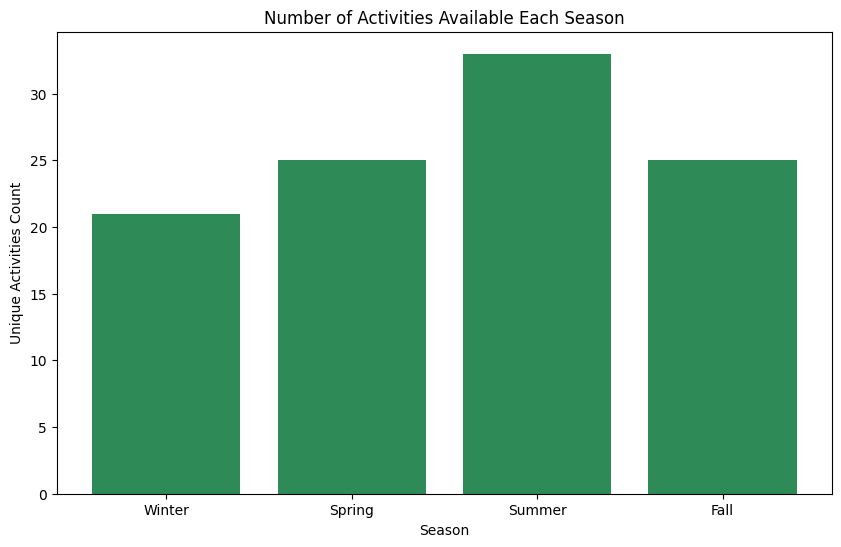

In [33]:
# Count the number of unique non-None entries in each season list
unique_activities_count = {
    'Winter': len(set([activity for activity in Winter if activity is not None])),
    'Spring': len(set([activity for activity in Spring if activity is not None])),
    'Summer': len(set([activity for activity in Summer if activity is not None])),
    'Fall': len(set([activity for activity in Fall if activity is not None]))
}

# Create a DataFrame with the unique activities count
df_unique_count = pd.DataFrame(list(unique_activities_count.items()), columns=['Season', 'Unique Activities Count'])

# Generate a bar graph to show the unique entries per season
plt.figure(figsize=(10, 6))
plt.bar(df_unique_count['Season'], df_unique_count['Unique Activities Count'], color='#2E8B57')
plt.xlabel('Season')
plt.ylabel('Unique Activities Count')
plt.title('Number of Activities Available Each Season')
plt.grid(False)
plt.show()

#### Findings: Visual review appears to show there is not a marked difference between the activity offerings between seasons. Summer has the most offerings, followed closely by equivalent offerings in Spring and Fall, with approximately 1/3 fewer offerings (vs Summer) avaialbel in the Winter.

### Consideration 3: Evaluate if there is a relationship between the max temp in each season and the number of unique activities available to do during that season

In [26]:
# Find the common activities in all four seasons
common_activities = set(Winter) & set(Spring) & set(Summer) & set(Fall)
common_activities

{'Arts and Culture',
 'Astronomy',
 'Auto and ATV',
 'Compass and GPS',
 'Flying',
 'Food',
 'Guided Tours',
 'Hands-On',
 'Hunting and Gathering',
 'Junior Ranger Program',
 'Living History',
 'Museum Exhibits',
 'Shopping',
 'Wildlife Watching'}

In [27]:
# Exclude common activities from each season list
Winter_filtered = [activity for activity in Winter if activity not in common_activities]
Spring_filtered = [activity for activity in Spring if activity not in common_activities]
Summer_filtered = [activity for activity in Summer if activity not in common_activities]
Fall_filtered = [activity for activity in Fall if activity not in common_activities]

In [28]:
# Count the number of unique non-common entries in each season list
unique_activities_count_filtered = {
    'Winter': len(set([activity for activity in Winter_filtered if activity is not None])),
    'Spring': len(set([activity for activity in Spring_filtered if activity is not None])),
    'Summer': len(set([activity for activity in Summer_filtered if activity is not None])),
    'Fall': len(set([activity for activity in Fall_filtered if activity is not None]))
}

In [29]:
# Create a DataFrame with the unique activities count excluding common activities
df_unique_count_filtered = pd.DataFrame(list(unique_activities_count_filtered.items()), columns=['Season', 'Unique Activities Count'])
df_unique_count_filtered

,Season,Unique Activities Count
0,Winter,7
1,Spring,11
2,Summer,19
3,Fall,11


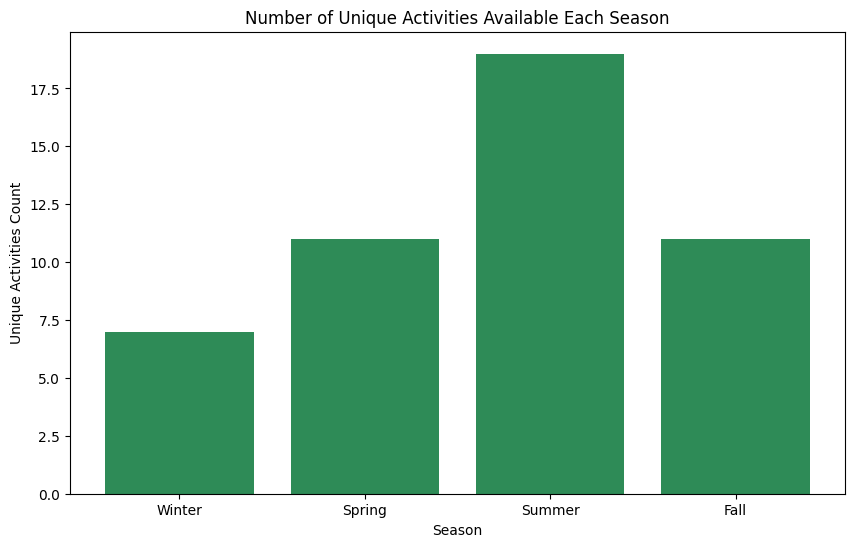

In [30]:
# Generate a bar graph to show the unique entries per season excluding common activities
plt.figure(figsize=(10, 6))
bars = plt.bar(df_unique_count_filtered['Season'], df_unique_count_filtered['Unique Activities Count'], color='#2E8B57') 
plt.xlabel('Season')
plt.ylabel('Unique Activities Count')
plt.title('Number of Unique Activities Available Each Season')
plt.grid(False)  # Remove grid lines
plt.show()

##### Once year-round activities are excluded from the datset, Summer offers nearly twice as many acitivity options as Spring or Fall, and almost three times as many activities as Winter. For holidays travelers seeking the most options, Summer is the preferred season to visit.